# From Scratch to Smart: CNNs and Transfer Learning for Image Classification

## Main Goals of the Project

### 1. Build a CNN from Scratch
- **Design and train** a custom Convolutional Neural Network to classify images from the **CIFAR-10 dataset**.  
- Include **convolutional, pooling, and fully connected layers**.  
- Apply best practices such as **normalization, data augmentation, and early stopping**.  

### 2. Apply Transfer Learning
- Utilize **pre-trained models** (e.g., VGG16, ResNet, Inception) trained on **ImageNet**.  
- Adapt them to CIFAR-10 through **feature extraction and/or fine-tuning**.  
- Compare which **pre-trained architecture achieves the best performance**.  

### 3. Evaluate and Compare Approaches
- Assess model performance using **accuracy, precision, recall, and F1-score**.  
- Visualize results with a **confusion matrix**.
- Directly compare your custom CNN vs. transfer learning models, analyzing advantages and trade-offs.

### 4. Critical Analysis and Insights
- Reflect on when to use models from scratch vs. transfer learning.
- Discuss trade-offs: data requirements, training time, accuracy, generalization.
   

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from collections import Counter

In [ ]:
save_dir = "/model_checkpoint"

## CNN Model Building

### Model 1

#### Data Engineering

In [ ]:
from tensorflow.keras.datasets import cifar10


# Loading and splitting dataset into training and testing
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape #This is a 2 dimensional array. We need to reshape before we can work with it.The class_names/labels are stored as a 2D NumPy array with the shape (n,1)

(50000, 1)

In [ ]:
y_train =y_train.reshape(-1,)

In [ ]:
y_train.shape

(50000,)

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

-   In order to visualize the distribution of each class we need to first create a library to assign the classes to their indexes


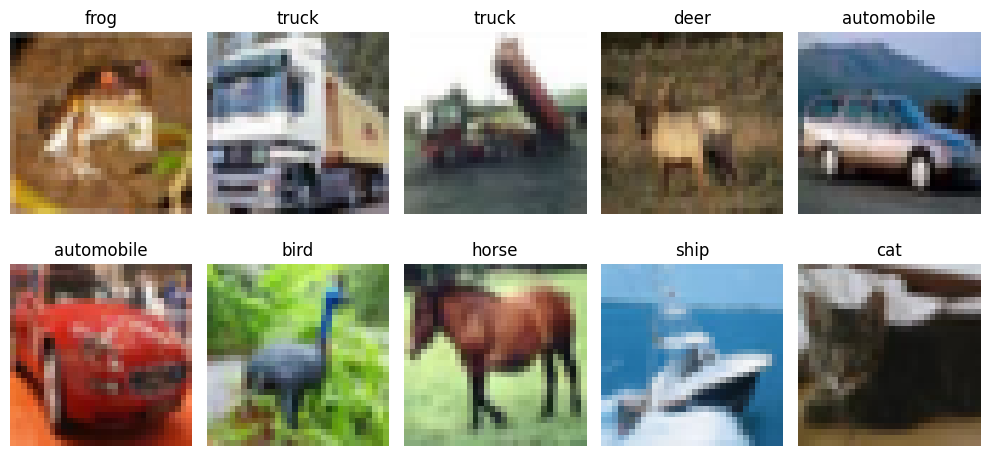

In [ ]:
# Label dictionary
class_names = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}


plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i].item()])
    plt.axis('off')
plt.tight_layout()
plt.show()


#### Data Preprocessing

In [ ]:
print(X_train.shape, X_test.shape)  # expect (50000, 32, 32, 3) and (10000, 32, 32, 3)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# Reshape to add channel dimension
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

# The class does not have to be converted to one hot encoding since the class is already in integers ie 2:bird etc. we can use it directly
# but then the loss has to be set to sparse_categorical_entropy

# Create a preprocessing layer for normalization
normalization_layer = Rescaling(1./255)
X_train = normalization_layer(X_train)
X_test = normalization_layer(X_test)


#### Building the CNN Model

In [ ]:
cnnmodel_serg_v1 =  Sequential([
    # First convolutional layer with 32 filters, 3x3 kernel, ReLU activation
    layers.Input(shape=(32,32,3)),
    # Input shape is 32x32 pixels with 3 color channel (RGB)
    Conv2D(32, (3,3), activation='relu'),
    # Max pooling layer to reduce spatial dimensions by a factor of 2
    MaxPooling2D(2,2),
    # Second convolutional layer with 64 filters, 3x3 kernel, ReLU activation
    Conv2D(64, (3,3), activation='relu'),
    # Another max pooling layer to reduce size further
    MaxPooling2D(2,2),
    # Flatten the 2D feature maps into a 1D vector for dense layers
    Flatten(),
    # Fully connected (dense) layer with 128 neurons and ReLU activation
    #Learns intermediate features from the previous layers
    Dense(128, activation='relu'),
    # Output layer with 10 neurons (for 10 classes) and softmax activation
    #Produces the final probabilities for each class.
    Dense(10, activation='softmax')
    ],name="cnnmodel_serg_v1")
cnnmodel_serg_v1.summary()

Model: "cnnmodel_serg_v1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

#### Compile & Train

In [ ]:
cnnmodel_serg_v1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = cnnmodel_serg_v1.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3633 - loss: 1.7467 - val_accuracy: 0.5414 - val_loss: 1.2915
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5781 - loss: 1.1929 - val_accuracy: 0.6223 - val_loss: 1.0815
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6443 - loss: 1.0163 - val_accuracy: 0.6431 - val_loss: 1.0278
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6784 - loss: 0.9151 - val_accuracy: 0.6599 - val_loss: 1.0031
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7031 - loss: 0.8449 - val_accuracy: 0.6704 - val_loss: 0.9611
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7272 - loss: 0.7846 - val_accuracy: 0.6848 - val_loss: 0.9450
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7491 - loss: 0.7198 - val_accuracy: 0.6771 - val_loss: 0.9577
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7688 - loss: 0.6599 -

#### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict class probabilities
y_pred_probs = cnnmodel_serg_v1.predict(X_test)

# Convert probabilities to class predictions
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test  # original integer labels

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.6582
Precision: 0.6601
Recall: 0.6582
F1 Score: 0.6571


In [ ]:
from sklearn.metrics import classification_report

class_names_list = [class_names[i] for i in range(len(class_names))]

# Then use it in classification_report
report = classification_report(y_true, y_pred, target_names=class_names_list)
print(report)

              precision    recall  f1-score   support

    airplane       0.68      0.67      0.67      1000
  automobile       0.80      0.76      0.78      1000
        bird       0.54      0.57      0.56      1000
         cat       0.46      0.48      0.47      1000
        deer       0.62      0.62      0.62      1000
         dog       0.61      0.48      0.53      1000
        frog       0.71      0.75      0.73      1000
       horse       0.69      0.73      0.71      1000
        ship       0.70      0.84      0.76      1000
       truck       0.80      0.69      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



In [ ]:
import plotly.express as px
from sklearn.metrics import confusion_matrix

# Predict
y_pred = cnnmodel_serg_v1.predict(X_test).argmax(axis=1)
y_true = y_test.squeeze()   # make sure labels are 1D ints

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# If class_names is a dict → turn it into a list
if isinstance(class_names, dict):
    class_names = [class_names[i] for i in range(len(class_names))]

# Plot with plotly
fig = px.imshow(
    cm,
    text_auto=True,  # show counts inside the squares
    x=class_names,
    y=class_names,
    color_continuous_scale="Inferno",
    labels=dict(x="Predicted", y="True", color="Count"),
    title="Confusion Matrix"
)
fig.update_xaxes(side="top")  # put predicted labels on top like seaborn
fig.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


**Insights to confusion matrix**:
- **Truck ↔ Automobile**  
  - Truck misclassified as automobile: **134**  
  - Automobile misclassified as truck: **121**  
  - Cars and trucks share many visual features, especially in low-resolution 32×32 images.

- **Cat ↔ Dog**  
  - Cat misclassified as dog: **256**  
  - Dog misclassified as cat: **125**  
  - A common confusion — both have similar textures and shapes at this scale.

- **Bird ↔ Cat / Dog / Deer**  
  - Bird misclassified as cat: **49**  
  - Bird misclassified as dog: **73**  
  - Bird misclassified as deer: **112**  
  - Birds are frequently mistaken for other animal classes, indicating difficulty in capturing fine-grained differences.

- **Deer ↔ Horse**  
  - Deer misclassified as horse: **116**  
  - Horse misclassified as deer: **81**  
  - Both are 4-legged animals with similar silhouettes, leading to frequent mix-ups.

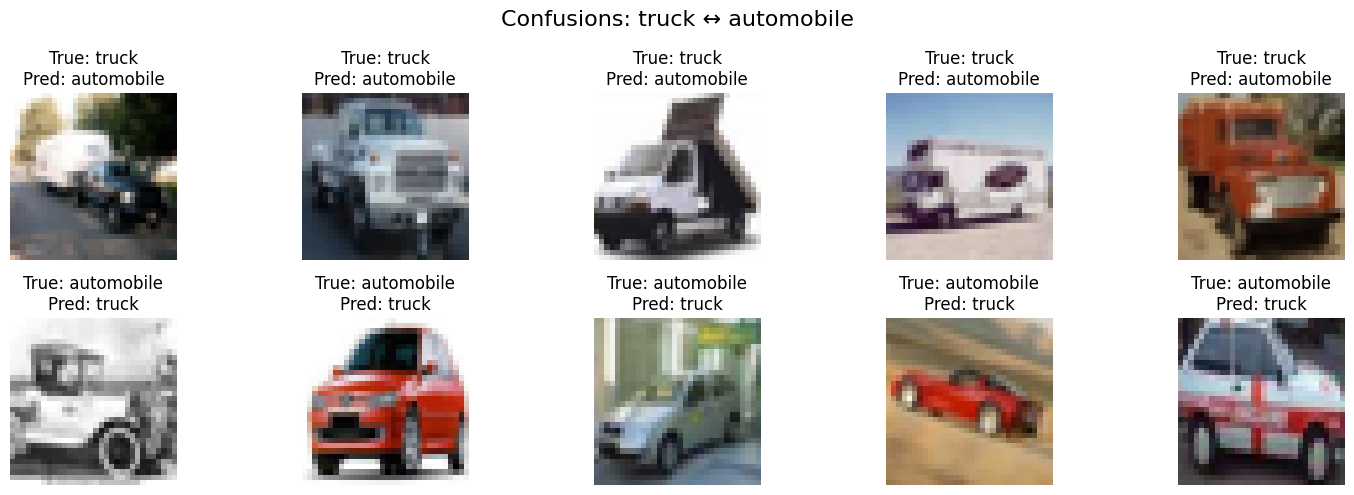

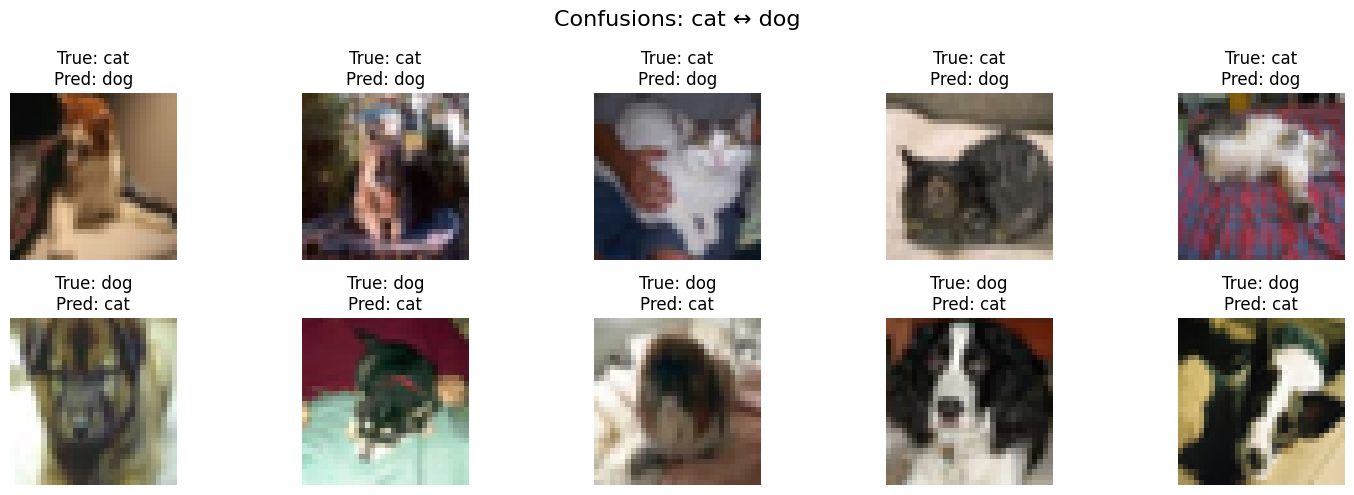

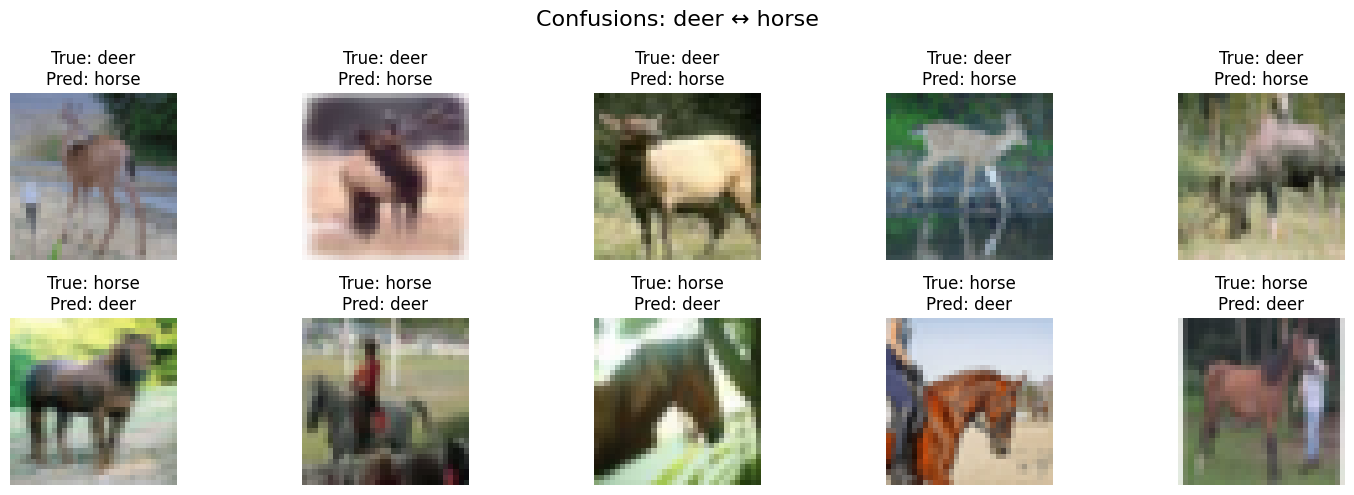

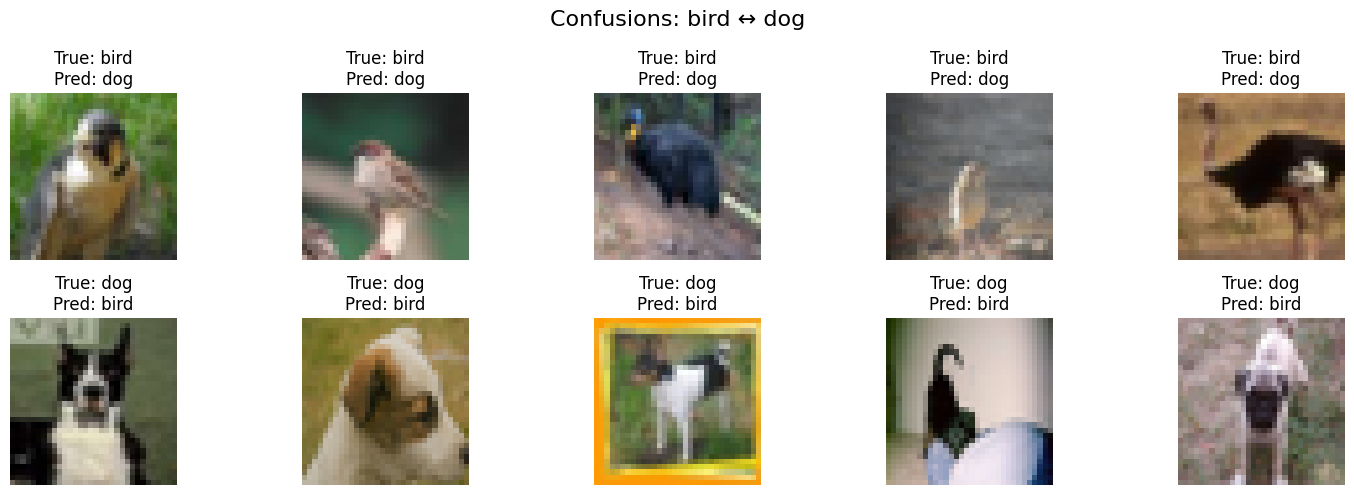

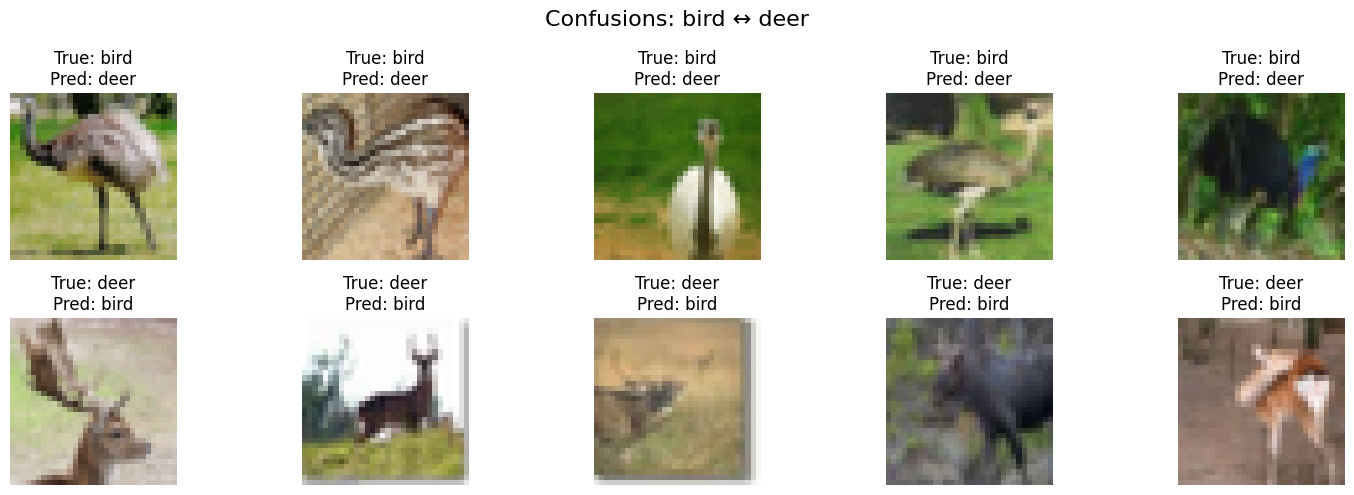

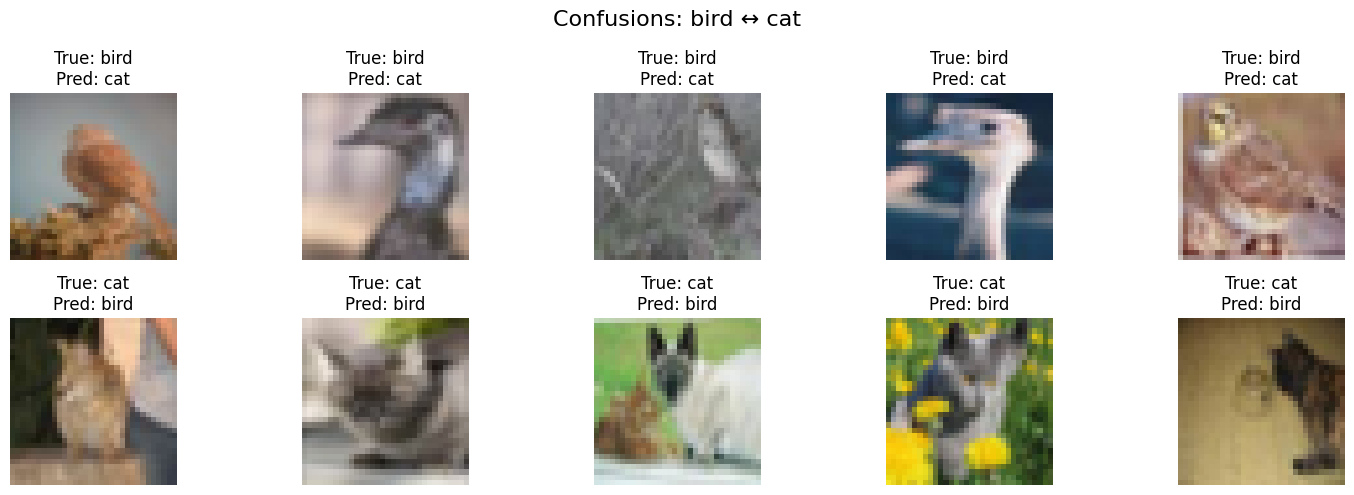

In [ ]:
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Converting X_test to numpy if it's a TensorFlow tensor
X_test_np = X_test.numpy() if hasattr(X_test, 'numpy') else X_test

# Confusing class pairs to inspect
confusing_pairs = [
    (9, 1),  # truck vs automobile
    (3, 5),  # Cat vs Dog
    (4, 7),  # deer vs horse
    (2, 5),  # bird vs dog
    (2, 4),  # bird vs deer
    (2, 3),  # bird vs cat
]

# Function to plot misclassified images between two specific classes
def show_confusion_examples(y_true, y_pred, X, class1, class2, n=5):
    # Find indices of images where class1 was confused with class2 and vice versa
    idx_confused_1 = np.where((y_true == class1) & (y_pred == class2))[0]
    idx_confused_2 = np.where((y_true == class2) & (y_pred == class1))[0]

    fig, axes = plt.subplots(2, n, figsize=(15, 5))
    fig.suptitle(f"Confusions: {class_names[class1]} ↔ {class_names[class2]}", fontsize=16)

    for i in range(n):
        if i < len(idx_confused_1):
            ax = axes[0, i]
            ax.imshow(X[idx_confused_1[i]].reshape(32, 32,3))
            ax.set_title(f"True: {class_names[class1]}\nPred: {class_names[class2]}")
            ax.axis('off')
        else:
            axes[0, i].axis('off')

        if i < len(idx_confused_2):
            ax = axes[1, i]
            ax.imshow(X[idx_confused_2[i]].reshape(32, 32,3))
            ax.set_title(f"True: {class_names[class2]}\nPred: {class_names[class1]}")
            ax.axis('off')
        else:
            axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Show misclassifications for each confusing pair
for class1, class2 in confusing_pairs:
    show_confusion_examples(y_true, y_pred, X_test_np, class1, class2)


## CNN Model Improvements

### Layer Optimizations

-   We first start here by adding more layers to the current model to see if the model shows any significant improvements

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers


cnnmodel_serg_v1 = Sequential([
    layers.Input(shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
], name="cnnmodel_serg_v2")

cnnmodel_serg_v1.summary()

Model: "cnnmodel_serg_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,898 (1.38 MB)

 Trainable params: 361,898 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

#### Compile & Train Improved Model

In [ ]:
cnnmodel_serg_v1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_v2 = cnnmodel_serg_v1.fit(X_train, y_train, epochs=60, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 164s 130ms/step - accuracy: 0.2912 - loss: 1.8939 - val_accuracy: 0.5513 - val_loss: 1.2566
Epoch 2/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 171s 137ms/step - accuracy: 0.5132 - loss: 1.3567 - val_accuracy: 0.6141 - val_loss: 1.0996
Epoch 3/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 191s 128ms/step - accuracy: 0.5788 - loss: 1.1937 - val_accuracy: 0.6496 - val_loss: 0.9848
Epoch 4/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 204s 130ms/step - accuracy: 0.6115 - loss: 1.0982 - val_accuracy: 0.6626 - val_loss: 0.9567
Epoch 5/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 210s 136ms/step - accuracy: 0.6389 - loss: 1.0237 - val_accuracy: 0.6763 - val_loss: 0.9314
Epoch 6/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 196s 131ms/step - accuracy: 0.6616 - loss: 0.9674 - val_accuracy: 0.7046 - val_loss: 0.8389
Epoch 7/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 160s 128ms/step - accuracy: 0.6751 - loss: 0.9148 - val_accuracy: 0.6902 - val_loss: 0.8637
Epoch 8/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 207s 132ms/step - ac

In [ ]:
cnnmodel_serg_v1.save("computer_visionproject.keras")

In [ ]:
cnnmodel_serg_v1.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NameError: name 'cnnmodel_v1' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict class probabilities
y_pred_probs = cnnmodel_serg_v1.predict(X_test)

# Convert probabilities to class predictions
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test  # original integer labels

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.7746
Precision: 0.7753
Recall: 0.7746
F1 Score: 0.7729


#### Evaluation of Improved Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict class probabilities using the improved model
y_pred_probs_v2 = cnnmodel_serg_v1.predict(X_test)

# Convert probabilities to class predictions
y_pred_v2 = y_pred_probs_v2.argmax(axis=1)

# Use the original integer labels for y_true
y_true = y_test

# Compute metrics
acc_v2 = accuracy_score(y_true, y_pred_v2)
prec_v2 = precision_score(y_true, y_pred_v2, average='weighted')
rec_v2 = recall_score(y_true, y_pred_v2, average='weighted')
f1_v2 = f1_score(y_true, y_pred_v2, average='weighted')

print(f"Accuracy (Improved Model): {acc_v2:.4f}")
print(f"Precision (Improved Model): {prec_v2:.4f}")
print(f"Recall (Improved Model): {rec_v2:.4f}")
print(f"F1 Score (Improved Model): {f1_v2:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy (Improved Model): 0.7746
Precision (Improved Model): 0.7753
Recall (Improved Model): 0.7746
F1 Score (Improved Model): 0.7729


In [ ]:
from sklearn.metrics import classification_report

class_names_list = [class_names[i] for i in range(len(class_names))]

# Then use it in classification_report
report_v2 = classification_report(y_true, y_pred_v2, target_names=class_names_list)
print(report_v2)

              precision    recall  f1-score   support

    airplane       0.79      0.79      0.79      1000
  automobile       0.90      0.88      0.89      1000
        bird       0.74      0.58      0.65      1000
         cat       0.61      0.56      0.59      1000
        deer       0.73      0.76      0.74      1000
         dog       0.66      0.75      0.70      1000
        frog       0.77      0.88      0.82      1000
       horse       0.81      0.82      0.81      1000
        ship       0.91      0.85      0.88      1000
       truck       0.83      0.88      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



In [ ]:
import plotly.express as px
from sklearn.metrics import confusion_matrix

# Predict
y_pred_v2 = cnnmodel_serg_v1.predict(X_test).argmax(axis=1)
y_true = y_test.squeeze()   # make sure labels are 1D ints

# Confusion matrix
cm_v2 = confusion_matrix(y_true, y_pred_v2)

# If class_names is a dict → turn it into a list
if isinstance(class_names, dict):
    class_names_list = [class_names[i] for i in range(len(class_names))]

# Plot with plotly
fig_v2 = px.imshow(
    cm_v2,
    text_auto=True,  # show counts inside the squares
    x=class_names_list,
    y=class_names_list,
    color_continuous_scale="Inferno",
    labels=dict(x="Predicted", y="True", color="Count"),
    title="Confusion Matrix (Improved Model)"
)
fig_v2.update_xaxes(side="top")  # put predicted labels on top like seaborn
fig_v2.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# Task
Improve the performance of a CNN model on the CIFAR-10 dataset by using transfer learning with a pre-trained model, and compare its performance to a custom CNN model.

## Choose a pre-trained model

### Subtask:
Select a pre-trained CNN model (e.g., VGG16, ResNet, Inception) that was trained on a large dataset like ImageNet.


**Reasoning**:
Select a pre-trained model from tf.keras.applications that is suitable for image classification and briefly explain the choice.



In [ ]:
# Selecting VGG16 as the pre-trained model
# VGG16 is a commonly used architecture for transfer learning due to its relatively simple yet effective architecture
# with multiple convolutional and max-pooling layers.
# It provides a good balance between complexity and performance for feature extraction.
from tensorflow.keras.applications import VGG16

# No code execution is needed for selection and explanation, just a markdown cell.

**Reasoning**:
Add a markdown cell to explain the choice of the pre-trained model.



In [ ]:
# No code execution is needed for selection and explanation, just a markdown cell.
# VGG16 is chosen as the pre-trained model.
# It is a widely used and well-understood CNN architecture.
# Its sequential nature with multiple convolutional and pooling layers makes it effective for hierarchical feature extraction.
# While other models like ResNet or Inception might offer higher accuracy, VGG16 is a good starting point
# for demonstrating transfer learning and is computationally less expensive than some deeper architectures.

## Load the pre-trained model

### Subtask:
Load the chosen pre-trained model without its top classification layer.


**Reasoning**:
Load the VGG16 model from tensorflow.keras.applications without the top classification layer, using weights trained on ImageNet.



In [ ]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model, trained on ImageNet, excluding the top fully-connected layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Print the summary of the base model
base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

## Freeze the base model layers

### Subtask:
Freeze the convolutional base layers of the pre-trained model so that their weights are not updated during training.


**Reasoning**:
Freeze the layers of the base model to prevent them from being trained.



In [ ]:
for layer in base_model.layers:
    layer.trainable = False
base_model.summary()

## Add new classification layers

### Subtask:
Add new dense layers on top of the frozen convolutional base, appropriate for the CIFAR-10 dataset (10 classes).


**Reasoning**:
Add new dense layers on top of the frozen convolutional base, appropriate for the CIFAR-10 dataset (10 classes).



In [ ]:
transfer_model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

transfer_model.summary()

## Compile the new model

### Subtask:
Compile the model with a suitable optimizer, loss function, and metrics.


**Reasoning**:
Compile the transfer learning model with the specified optimizer, loss function, and metrics.



In [ ]:
from tensorflow.keras.optimizers import Adam

transfer_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

## Train the new model

### Subtask:
Train the model on the CIFAR-10 dataset with the new classification layers.


**Reasoning**:
Train the compiled transfer learning model using the training data, applying a validation split and early stopping, and store the training history.



In [ ]:
history_transfer = transfer_model.fit(X_train, y_train, epochs=30, validation_split=0.2, callbacks=[early_stopping])

## Evaluate the transfer learning model

### Subtask:
Evaluate the performance of the transfer learning model using appropriate metrics and visualize the results with a confusion matrix.

**Reasoning**:
Evaluate the performance of the trained transfer learning model using accuracy, precision, recall, and F1-score, and generate a classification report and confusion matrix.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import plotly.express as px
import numpy as np

# Predict class probabilities using the transfer learning model
y_pred_probs_transfer = transfer_model.predict(X_test)

# Convert probabilities to class predictions
y_pred_transfer = y_pred_probs_transfer.argmax(axis=1)

# Use the original integer labels for y_true
y_true = y_test

# Compute metrics
acc_transfer = accuracy_score(y_true, y_pred_transfer)
prec_transfer = precision_score(y_true, y_pred_transfer, average='weighted')
rec_transfer = recall_score(y_true, y_pred_transfer, average='weighted')
f1_transfer = f1_score(y_true, y_pred_transfer, average='weighted')

print(f"Accuracy (Transfer Learning Model): {acc_transfer:.4f}")
print(f"Precision (Transfer Learning Model): {prec_transfer:.4f}")
print(f"Recall (Transfer Learning Model): {rec_transfer:.4f}")
print(f"F1 Score (Transfer Learning Model): {f1_transfer:.4f}")

# Generate classification report
class_names_list = [class_names[i] for i in range(len(class_names))]
report_transfer = classification_report(y_true, y_pred_transfer, target_names=class_names_list)
print("\nClassification Report (Transfer Learning Model):\n", report_transfer)

# Confusion matrix
cm_transfer = confusion_matrix(y_true, y_pred_transfer)

# Plot with plotly
fig_transfer = px.imshow(
    cm_transfer,
    text_auto=True,  # show counts inside the squares
    x=class_names_list,
    y=class_names_list,
    color_continuous_scale="Inferno",
    labels=dict(x="Predicted", y="True", color="Count"),
    title="Confusion Matrix (Transfer Learning Model)"
)
fig_transfer.update_xaxes(side="top")  # put predicted labels on top like seaborn
fig_transfer.show()